In [1]:
import yfinance as yf

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
a = input("Enter the Stock Symbol(Add .NS for Indian stocks): ")
ticker = yf.Ticker(a.upper())
data = ticker.history(period="10y")  
data 

Enter the Stock Symbol(Add .NS for Indian stocks):  itc.ns


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-11-24 00:00:00+05:30,187.574274,189.565988,187.574274,189.061752,8574399,0.0,0.0
2014-11-25 00:00:00+05:30,188.683595,191.003073,175.800475,179.204041,25213153,0.0,0.0
2014-11-26 00:00:00+05:30,180.767166,184.700173,180.565476,183.237900,21441625,0.0,0.0
2014-11-27 00:00:00+05:30,182.607645,183.263149,179.128440,181.826080,15975549,0.0,0.0
2014-11-28 00:00:00+05:30,181.826031,184.548888,181.523496,183.111832,10463496,0.0,0.0
...,...,...,...,...,...,...,...
2024-11-14 00:00:00+05:30,471.200012,472.950012,462.250000,465.950012,11639562,0.0,0.0
2024-11-18 00:00:00+05:30,466.000000,467.799988,462.000000,466.549988,8135260,0.0,0.0
2024-11-19 00:00:00+05:30,468.000000,473.750000,466.250000,467.350006,6857374,0.0,0.0


In [22]:
data['SMA_50'] = data['Close'].rolling(window=50).mean()

delta = data['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = abs(delta.where(delta < 0, 0))
Avg_gain = gain.rolling(14).mean() 
Avg_loss = loss.rolling(14).mean() 
RS = (((Avg_gain.rolling(2).sum() - Avg_gain) * 13) + gain) / (((Avg_loss.rolling(2).sum() - Avg_loss) * 13) + loss)

data['RSI'] = 100 - (100 / (1 + RS))


In [24]:
data.head(51)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,SMA_50,RSI
Date,,,,,,,,,
2014-11-24 00:00:00+05:30,187.574274,189.565988,187.574274,189.061752,8574399,0.0,0.0,NaN,NaN
2014-11-25 00:00:00+05:30,188.683595,191.003073,175.800475,179.204041,25213153,0.0,0.0,NaN,NaN
2014-11-26 00:00:00+05:30,180.767166,184.700173,180.565476,183.237900,21441625,0.0,0.0,NaN,NaN
2014-11-27 00:00:00+05:30,182.607645,183.263149,179.128440,181.826080,15975549,0.0,0.0,NaN,NaN
2014-11-28 00:00:00+05:30,181.826031,184.548888,181.523496,183.111832,10463496,0.0,0.0,NaN,NaN
2014-12-01 00:00:00+05:30,182.607590,185.027901,182.607590,183.842957,8216886,0.0,0.0,NaN,NaN
2014-12-02 00:00:00+05:30,183.742134,185.002717,183.338743,184.448059,8593438,0.0,0.0,NaN,NaN
2014-12-03 00:00:00+05:30,184.548896,184.548896,180.061231,183.162262,7861830,0.0,0.0,NaN,NaN
2014-12-04 00:00:00+05:30,188.103741,193.625084,188.103741,193.196487,26675352,0.0,0.0,NaN,NaN


In [26]:
data.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,SMA_50,RSI
Date,,,,,,,,,
2024-11-14 00:00:00+05:30,471.200012,472.950012,462.250000,465.950012,11639562,0.0,0.0,497.348002,43.895077
2024-11-18 00:00:00+05:30,466.000000,467.799988,462.000000,466.549988,8135260,0.0,0.0,496.455001,30.658418
2024-11-19 00:00:00+05:30,468.000000,473.750000,466.250000,467.350006,6857374,0.0,0.0,495.768001,28.845017
2024-11-21 00:00:00+05:30,461.000000,464.049988,455.399994,457.149994,19559847,0.0,0.0,494.676001,16.172283
2024-11-22 00:00:00+05:30,456.200012,476.500000,455.500000,474.649994,19464568,0.0,0.0,493.897001,37.281415


In [7]:
data2 = data[['Close','SMA_50','RSI']].tail(2000)
# data2.tail()

In [8]:
data2.shape

(2000, 3)

<Axes: xlabel='Date'>

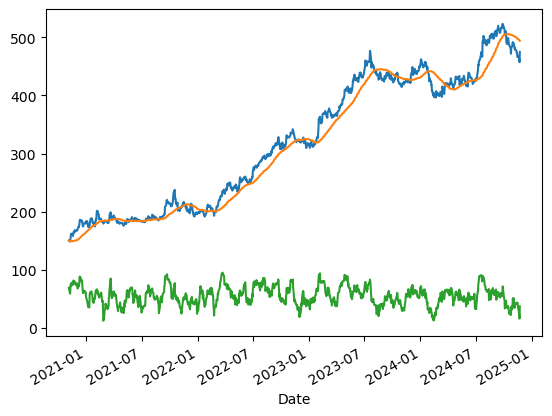

In [9]:
data2['Close'].tail(1000).plot(kind="line")
data2['SMA_50'].tail(1000).plot(kind="line")
data2['RSI'].tail(1000).plot(kind="line")

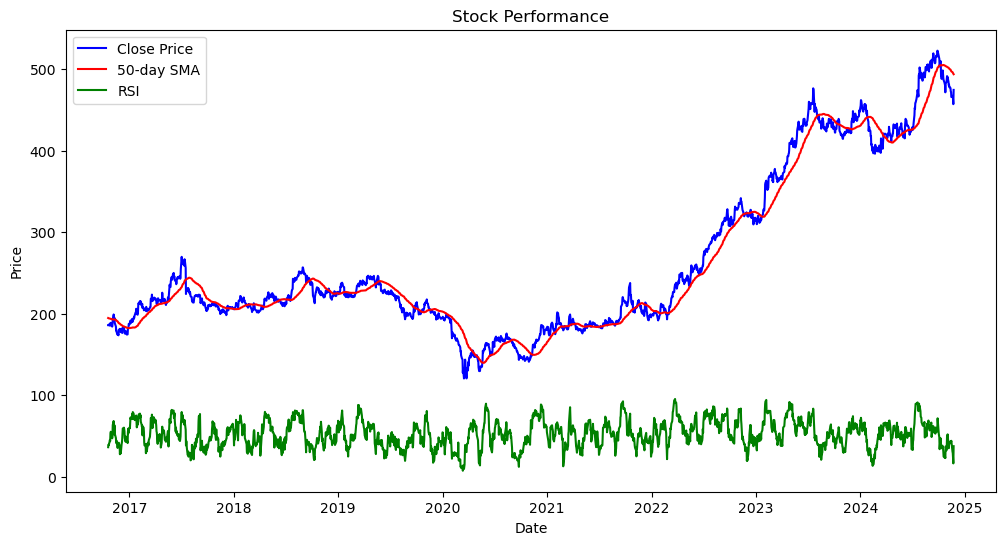

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(data2.index, data2['Close'], label='Close Price', color='blue')
plt.plot(data2.index, data2['SMA_50'], label='50-day SMA', color='red')
plt.plot(data2.index, data2['RSI'], label='RSI', color='green')
plt.title("Stock Performance")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()